### Importing Required Libraries

In [1]:
import os
from google.colab import files, drive
import zipfile
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dir_path = "/content/drive/My Drive/Machine Learning Datasets/"
zipfile_path = dir_path + "/ml-latest-small.zip"

In [4]:
if os.path.exists(zipfile_path):
    with zipfile.ZipFile(zipfile_path, 'r') as zip_ref:
        zip_ref.extractall(dir_path)
    os.remove(zipfile_path)
dir_path = dir_path + "/ml-latest-small"

In [5]:
dir_path

'/content/drive/My Drive/Machine Learning Datasets//ml-latest-small'

In [6]:
ratings = pd.read_csv((dir_path + "/ratings.csv"))
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


### Distribution Of Ratings

In [8]:
def plot_dist(df, col, bins, x_label):
    plt.figure(figsize =(15, 10))
    sns.distplot(df[col], bins = bins, kde = False)
    plt.xlabel(x_label)
    plt.ylabel('Records')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


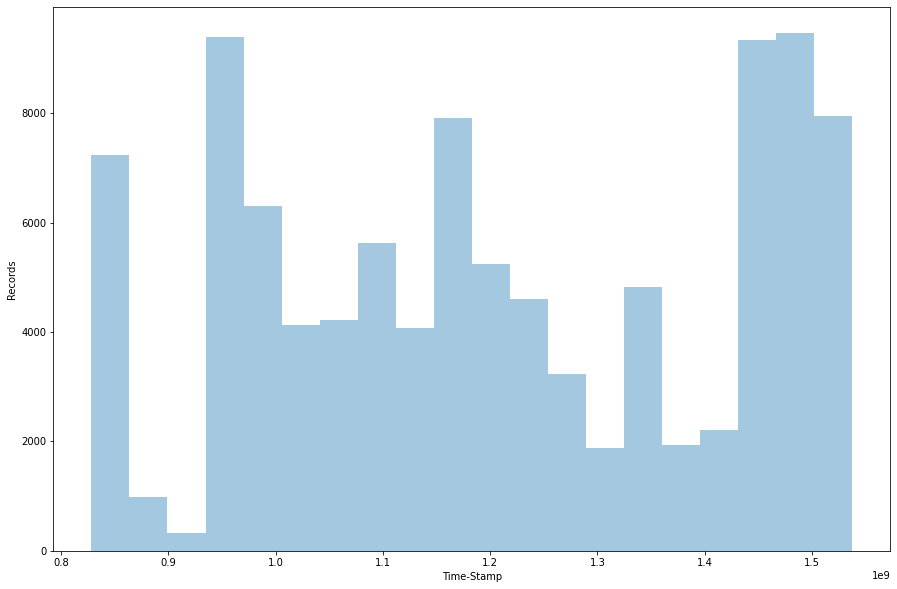

In [9]:
plot_dist(ratings, 'timestamp', bins = 20, x_label = "Time-Stamp")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


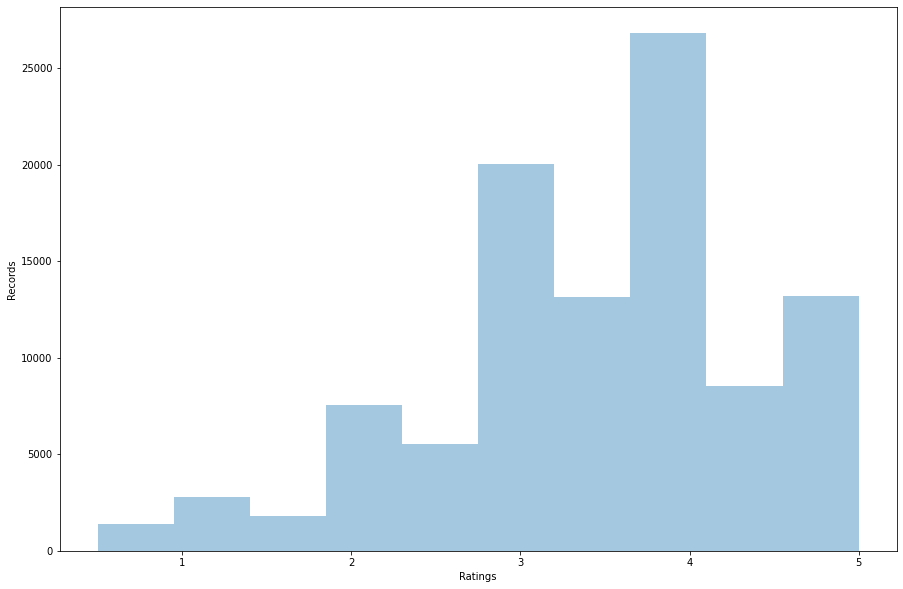

In [10]:
plot_dist(ratings, 'rating', bins = 10, x_label = "Ratings")

In [15]:
len(ratings)

100836

### Preprocessing to minimize memory Usage

In [16]:
# Ratings are discrete values belonging to [0, 5] at intervals of 0.5
# We multiply them with 2 to get integral values such that we can use uint8 datatype 
ratings['rating'] = (ratings['rating'] * 2).astype(np.uint8)

In [17]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 66716 to 81336
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     100836 non-null  int64 
 1   movieId    100836 non-null  int64 
 2   rating     100836 non-null  uint8 
 3   TimeStamp  100836 non-null  object
dtypes: int64(2), object(1), uint8(1)
memory usage: 3.2+ MB


### Build User Rating Matrix

In [21]:
URM = (ratings.pivot('userId', 'movieId', 'rating').fillna(0)).astype(np.int8)

In [22]:
URM.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,8,0,8,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
URM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 1 to 610
Columns: 9724 entries, 1 to 193609
dtypes: int8(9724)
memory usage: 5.7 MB


In [24]:
URM.to_csv(dir_path + '/UserRatingMatrix.csv')